In [1]:
from Data_Enrichment import get_features

RAW_DIR = "data/raw"
df_feats, feature_cols = get_features(RAW_DIR)
df_feats = df_feats[(df_feats['season_end_year'] != 2025) & (df_feats['season_end_year'] != 2026)]

/workspaces/Machine-learning/Data_Enrichment.py:300: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ballon_dor_winner"] = df["ballon_dor_winner"].fillna(False).astype(bool)


In [2]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [3]:
# %%
selected_features = [
    'a_per90_z_lag1', 'matches_played_z_lag1', 'ga_per90_z_lag1',
    'pen_share_z_lag1', 'g_per90_z_lag1', 'g_per90_z_delta',
    'a_per90_w', 'ga_per90_z_delta', 'ga_per90_w', 'g_per90_w',
    'a_per90_z_delta', 'pen_share_w', 'minutes_played_z_delta',
    'minutes_played_z_lag1', 'pen_share_z_delta',
    'main_position', 'age', 'height', 'discipline_rate_z_lag1',
    'position'
]

df = df_feats[selected_features].copy()
print(f"Selected {len(selected_features)} features.")
df.head()


Selected 20 features.


,a_per90_z_lag1,matches_played_z_lag1,ga_per90_z_lag1,pen_share_z_lag1,g_per90_z_lag1,g_per90_z_delta,a_per90_w,ga_per90_z_delta,ga_per90_w,g_per90_w,a_per90_z_delta,pen_share_w,minutes_played_z_delta,minutes_played_z_lag1,pen_share_z_delta,main_position,age,height,discipline_rate_z_lag1,position
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.784314,0.000000,1.176471,0.392157,0.000000,0.000000,0.000000,0.000000,0.000000,Attack,45.0,0.0,0.000000,Attack - Right Winger
1,0.622258,-0.962531,0.247975,-0.216350,0.033333,-0.212685,-0.392157,-0.449930,-0.588235,-0.196078,-0.829866,0.000000,-0.188925,-0.463744,0.015805,Attack,45.0,0.0,-0.773147,Attack - Right Winger
2,-0.207608,-1.170662,-0.201955,-0.200545,-0.179352,0.024415,-0.392157,0.033502,-0.588235,-0.196078,0.030091,0.000000,-0.008392,-0.652669,0.001015,Attack,45.0,0.0,-0.914319,Attack - Right Winger
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.546369,0.000000,-7.080305,-4.533936,0.000000,-0.042915,0.000000,0.000000,0.000000,Attack,47.0,184.0,0.000000,Attack - Centre-Forward
4,-0.213605,-1.378630,-0.233856,-0.223287,-0.226410,1.240869,-1.444328,1.134800,-2.672142,-1.227813,0.785055,-0.042915,0.425452,-0.787591,0.006937,Attack,47.0,184.0,-0.960068,Attack - Centre-Forward


In [ ]:

# --- One-hot encode categorical features ---
df_encoded = pd.get_dummies(df, columns=['main_position', 'position'], drop_first=True)

# --- Standardize numerical features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.select_dtypes(include=np.number))

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=df_encoded.select_dtypes(include=np.number).columns
)

print(f"Scaled data shape: {X_scaled_df.shape}")
X_scaled_df.head()



Scaled data shape: (70927, 18)


,a_per90_z_lag1,matches_played_z_lag1,ga_per90_z_lag1,pen_share_z_lag1,g_per90_z_lag1,g_per90_z_delta,a_per90_w,ga_per90_z_delta,ga_per90_w,g_per90_w,a_per90_z_delta,pen_share_w,minutes_played_z_delta,minutes_played_z_lag1,pen_share_z_delta,age,height,discipline_rate_z_lag1
0,-0.052453,-0.153307,-0.046588,-0.022538,-0.041105,-0.004803,1.736261,-0.006157,0.789956,0.336199,-0.007500,0.002756,-0.015089,-0.081352,-0.014083,0.749617,-3.579418,-0.045677
1,0.890568,-1.273548,0.335617,-0.263126,0.010562,-0.343010,-0.877991,-0.737156,-0.402963,-0.174502,-1.267685,0.002756,-0.204825,-0.585542,0.000346,0.749617,-3.579418,-0.987343
2,-0.367080,-1.515781,-0.357862,-0.245550,-0.319103,0.034021,-0.877991,0.048274,-0.402963,-0.174502,0.038194,0.002756,-0.023517,-0.790944,-0.013157,0.749617,-3.579418,-1.159286
3,-0.052453,-0.153307,-0.046588,-0.022538,-0.041105,-0.004803,-5.664896,-0.006157,-4.791521,-3.940588,-0.007500,-0.476726,-0.015089,-0.081352,-0.014083,0.969916,0.311271,-0.045677
4,-0.376168,-1.757825,-0.407032,-0.270840,-0.392044,1.968402,-3.216035,1.837548,-1.811657,-1.070244,1.184637,-0.476726,0.412189,-0.937633,-0.007750,0.969916,0.311271,-1.215006


In [5]:
# %%
kmeans = KMeans(n_clusters=3, random_state=1, n_init=50)
labels = kmeans.fit_predict(X_scaled_df)

df_encoded['kmeans_cluster'] = labels.astype(str)

sil_score = silhouette_score(X_scaled_df, labels)
print(f"✅ K-Means completed | Silhouette Score: {sil_score:.3f}")



✅ K-Means completed | Silhouette Score: 0.584


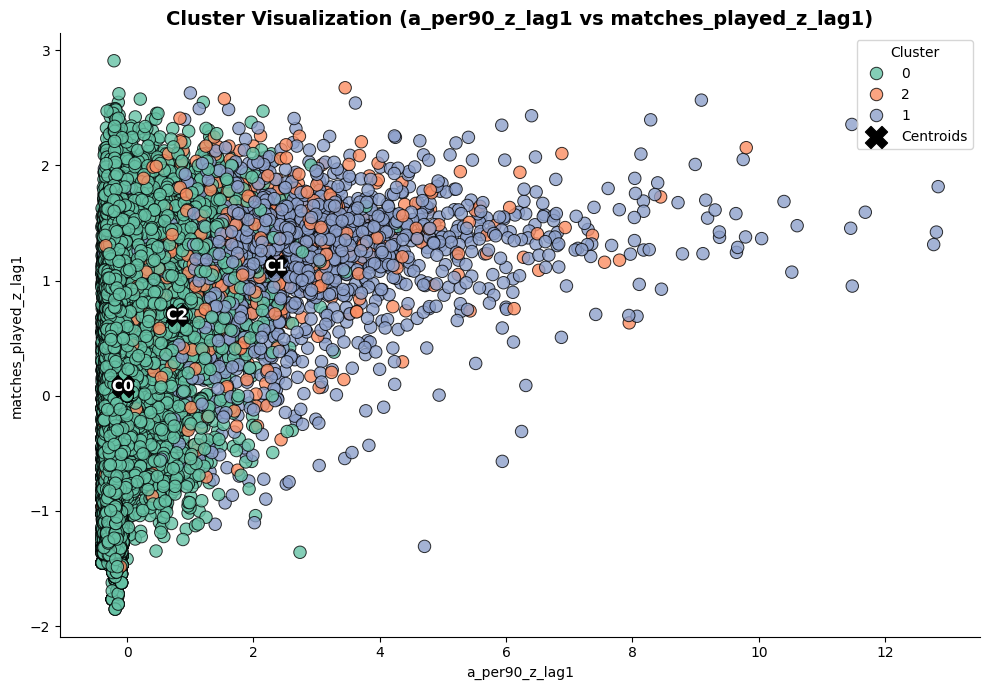

In [7]:
# %%
x_var = "a_per90_z_lag1"
y_var = "matches_played_z_lag1"

plt.figure(figsize=(10, 7))
palette = sns.color_palette("Set2", n_colors=df_encoded['kmeans_cluster'].nunique())

sns.scatterplot(
    data=df_encoded, x=x_var, y=y_var,
    hue='kmeans_cluster', palette=palette,
    s=80, edgecolor='black', alpha=0.8
)

centroids = df_encoded.groupby('kmeans_cluster')[[x_var, y_var]].mean()
plt.scatter(centroids[x_var], centroids[y_var],
            c='black', s=250, marker='X', label='Centroids')

for i, (x, y) in enumerate(zip(centroids[x_var], centroids[y_var])):
    txt = plt.text(x, y, f'C{i}', fontsize=11, weight='bold', color='white',
                   ha='center', va='center')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'),
                          path_effects.Normal()])

plt.title(f'Cluster Visualization ({x_var} vs {y_var})', fontsize=14, weight='bold')
plt.legend(title='Cluster')
sns.despine()
plt.tight_layout()
plt.show()


/workspaces/Machine-learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


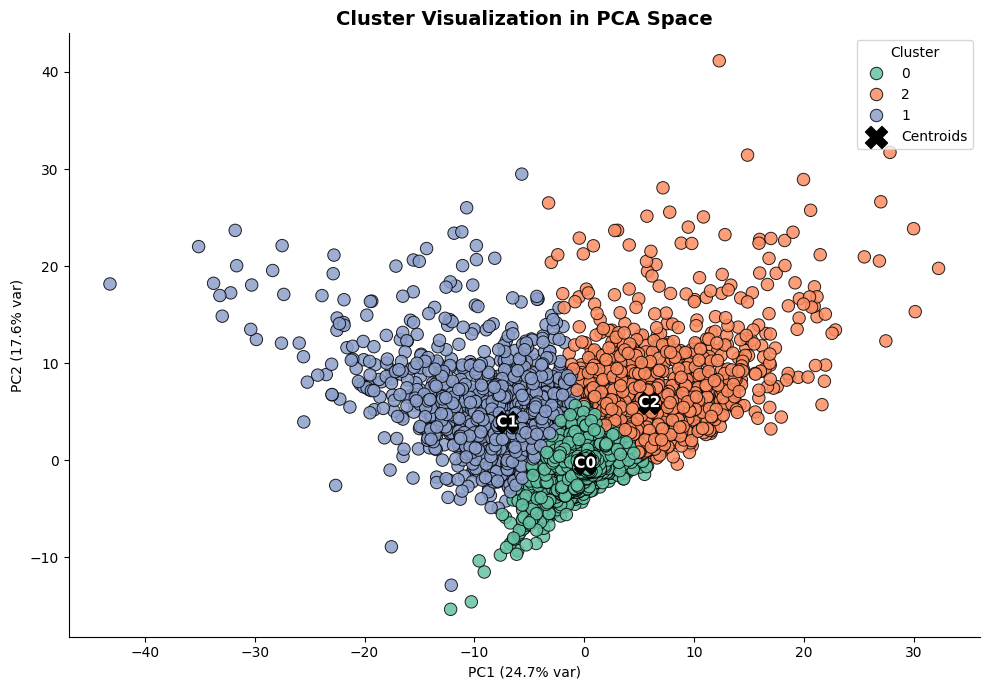

In [8]:
# %%
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_df)

df_pca = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Cluster': df_encoded['kmeans_cluster']
})

plt.figure(figsize=(10, 7))
palette = sns.color_palette("Set2", n_colors=df_encoded['kmeans_cluster'].nunique())

sns.scatterplot(
    data=df_pca, x='PC1', y='PC2',
    hue='Cluster', palette=palette,
    s=80, edgecolor='black', alpha=0.85
)

centroids_pca = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=['PC1', 'PC2'])
plt.scatter(
    centroids_pca['PC1'], centroids_pca['PC2'],
    c='black', s=250, marker='X', label='Centroids'
)

for i, (x, y) in enumerate(zip(centroids_pca['PC1'], centroids_pca['PC2'])):
    txt = plt.text(x, y, f'C{i}', fontsize=11, weight='bold', color='white',
                   ha='center', va='center')
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'),
                          path_effects.Normal()])

plt.title('Cluster Visualization in PCA Space', fontsize=14, weight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
plt.legend(title='Cluster')
sns.despine()
plt.tight_layout()
plt.show()


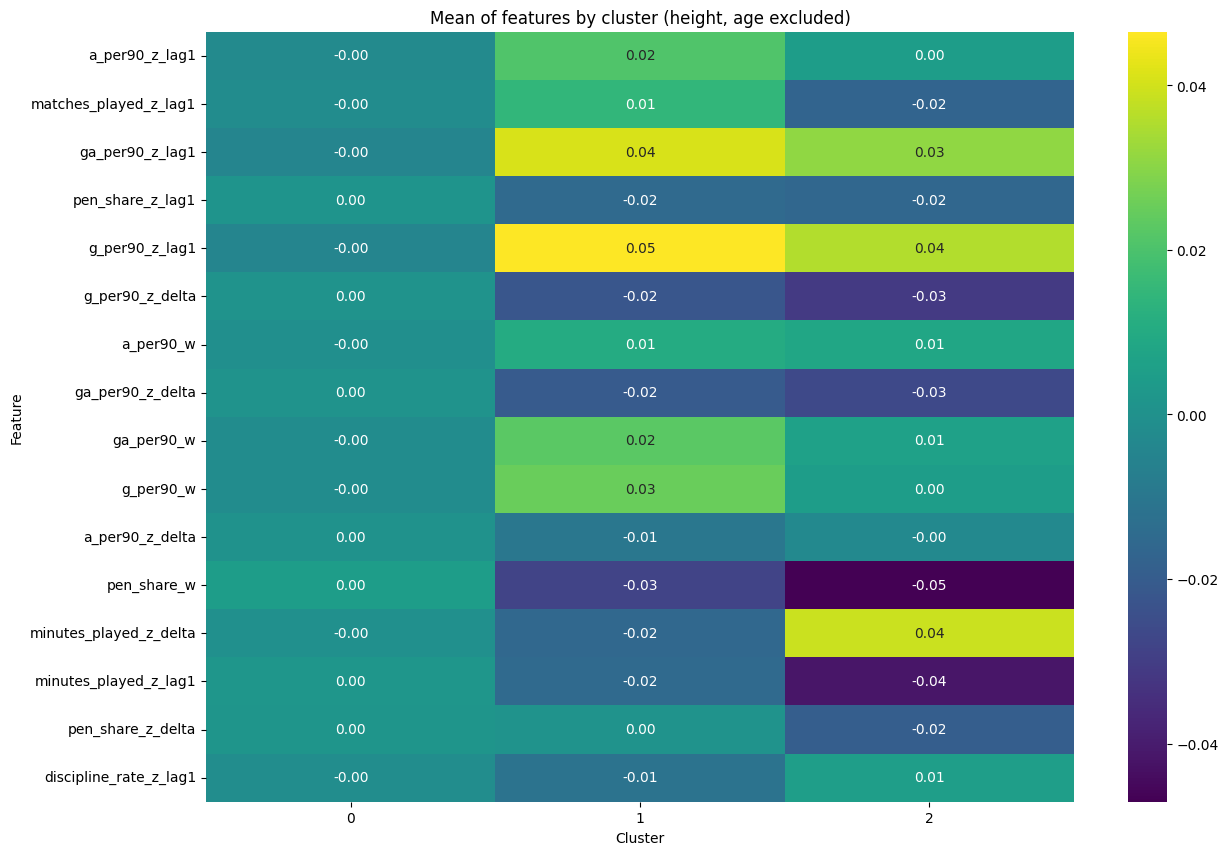

In [9]:
# %%
features_for_analysis = [
    f for f in X_scaled_df.columns
    if 'height' not in f and 'age' not in f
]

df_means = pd.concat([X_scaled_df[features_for_analysis], df_encoded['kmeans_cluster']], axis=1)
cluster_means = df_means.groupby('kmeans_cluster').mean().T

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mean of features by cluster (height, age excluded)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


/tmp/ipykernel_2067/1097719907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')


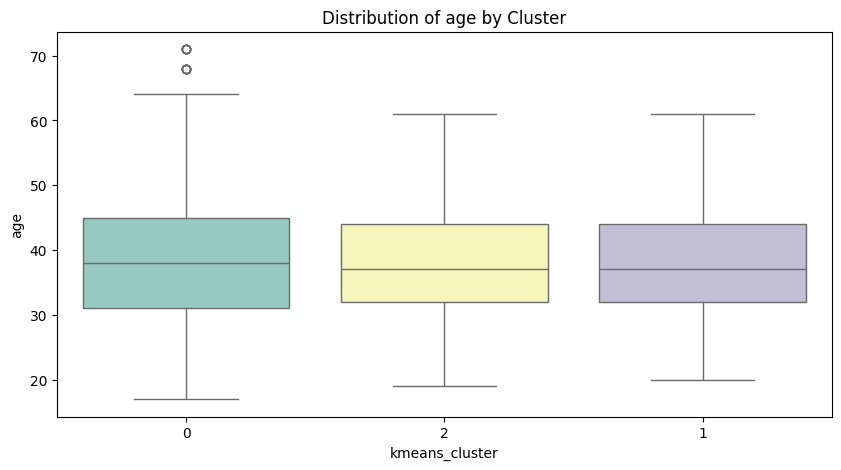

/tmp/ipykernel_2067/1097719907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')


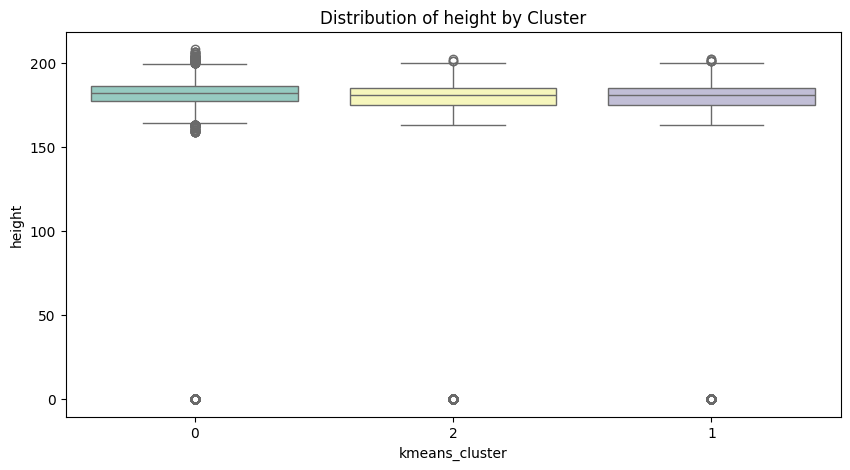

/tmp/ipykernel_2067/1097719907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')


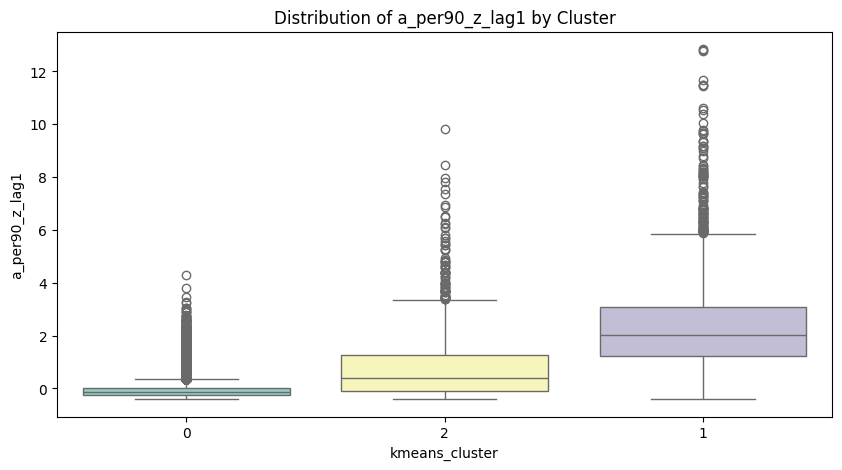

/tmp/ipykernel_2067/1097719907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')


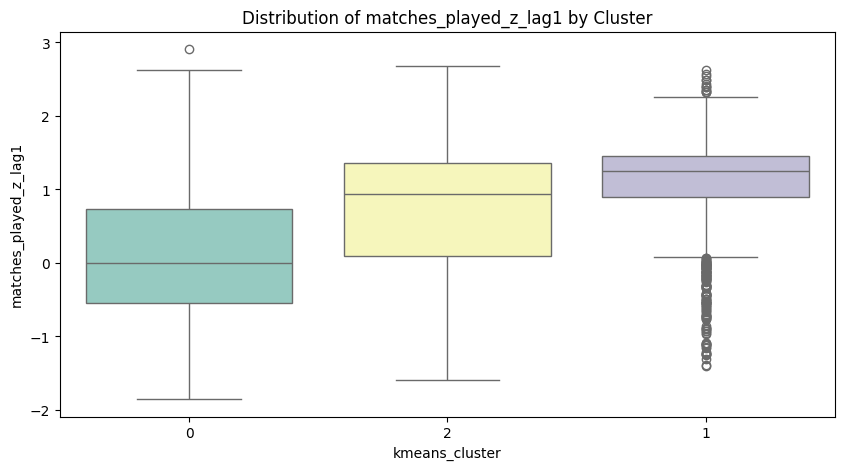

/tmp/ipykernel_2067/1097719907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')


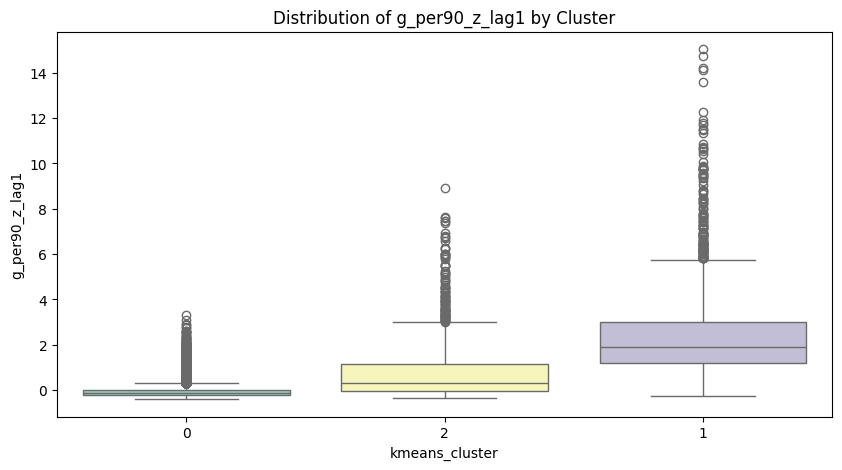

/tmp/ipykernel_2067/1097719907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')


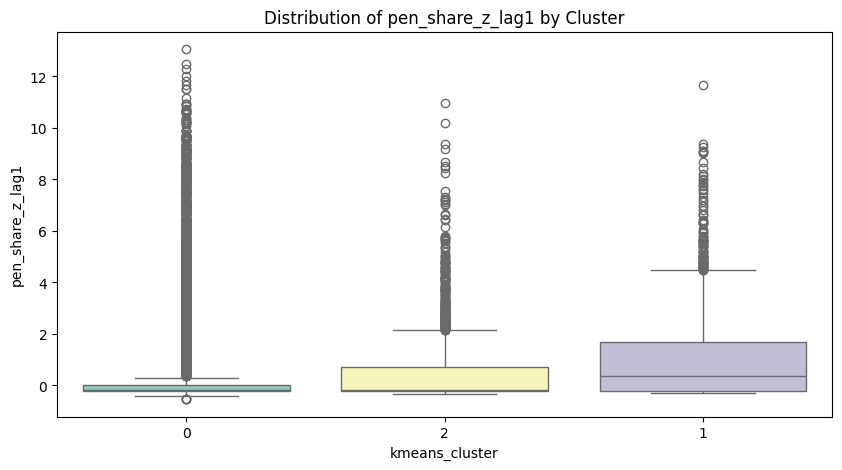

In [13]:
# %%
variables = ["age", "height", "a_per90_z_lag1", "matches_played_z_lag1", "g_per90_z_lag1", "pen_share_z_lag1"]

for var in variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='kmeans_cluster', y=var, data=df_encoded, palette='Set3')
    plt.title(f'Distribution of {var} by Cluster')
    plt.show()


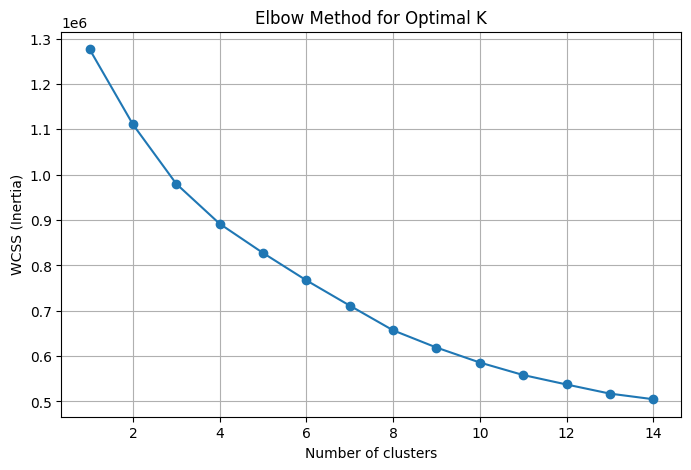

In [11]:
# %%
wcss = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


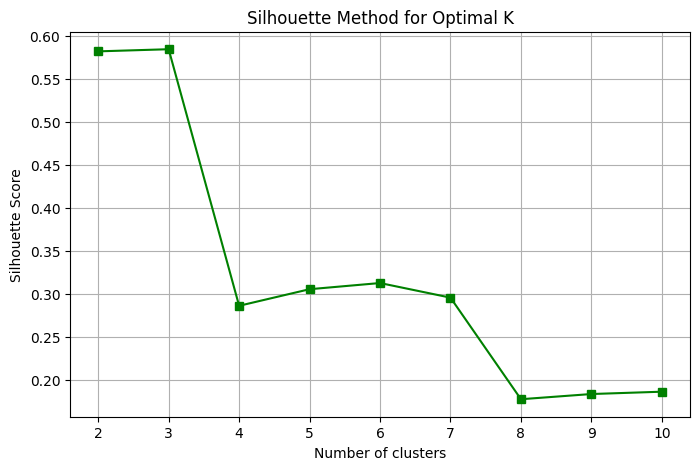

In [12]:
# %%
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.grid(True)
plt.show()
